# Surival Analysis

### Explain what the project is

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index as cindex
from sklearn.model_selection import train_test_split


## DATA

In [3]:
# Load the data
df = pd.read_csv('Data/haberman.csv', names = ['Age','Operation_year','Nb_pos_detected','Surv'])

FileNotFoundError: [Errno 2] No such file or directory: 'Data/haberman.csv'

In [4]:
print(df.shape)

df.head()

NameError: name 'df' is not defined

In [13]:
# split data in train, val en test
np.random.seed(0)
df_dev, df_test = train_test_split(df, test_size= 0.2)
df_train, df_val = train_test_split(df, test_size= 0.25)

print("Total number of patients in training set:", df_train.shape[0])
print("Total number of patients in validation set:", df_val.shape[0])
print("Total number of patients in test set:", df_test.shape[0])

Total number of patients in training set: 229
Total number of patients in validation set: 77
Total number of patients in test set: 62


In [14]:
# normalize the continuous covariates

continuous_columns = ['Operation_year','Nb_pos_detected']
mean = df_train.loc[:, continuous_columns].mean()
std = df_train.loc[:, continuous_columns].std()
df_train.loc[:, continuous_columns] = (df_train.loc[:, continuous_columns] - mean) / std
df_val.loc[:, continuous_columns] = (df_val.loc[:, continuous_columns] - mean) / std
df_test.loc[:, continuous_columns] = (df_test.loc[:, continuous_columns] - mean) / std

In [15]:
# check if the normalization worked
df_train.loc[:, continuous_columns].describe()

,Operation_year,Nb_pos_detected
count,2.290000e+02,2.290000e+02
mean,1.755025e-16,6.205613e-17
std,1.000000e+00,1.000000e+00
min,-1.519099e+00,-5.575568e-01
25%,-9.044814e-01,-5.575568e-01
50%,1.744549e-02,-4.225879e-01
75%,9.393724e-01,-1.768150e-02
max,1.861299e+00,6.460822e+00


## Model building

### The Kaplan Meier Estimator

##### We can use this estiamtor to estimate the survivial function
##### Visually we can incpect the probability of an event at a certain time interval.

<Axes: xlabel='timeline'>

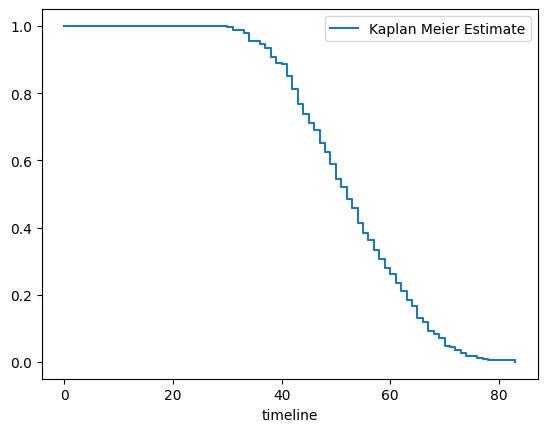

In [26]:
## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(df_train.Age, df_train.Surv,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

In [ ]:
# We can also make different survival groups for subgroups in our data

## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = df_train['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(df_train.Age[i1], df_train.Surv[i1], label='at least one positive axillary detected')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(df_train.Age[i2], df_train.Surv[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1)

### Cox Proportional Hazards model

#### The Cox model gives us the ability to include covariates in the model.

In [1]:
cph = CoxPHFitter()
cph.fit(df_train, duration_col = 'Age', event_col = 'Surv')
cph.print_summary()

NameError: name 'CoxPHFitter' is not defined

<Axes: xlabel='log(HR) (95% CI)'>

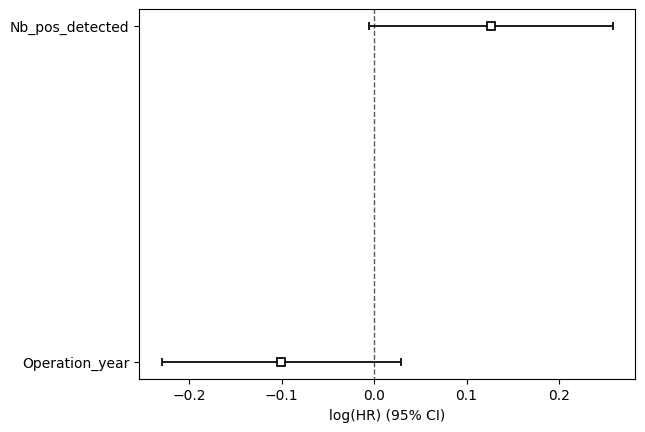

In [21]:
cph.plot()